In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
x = np.array([2, 6, 6, 10, 11, 11, 12, 12, 14, 16])
y = np.array([40, 120, 135, 154, 160, 165, 190, 200, 210, 215])

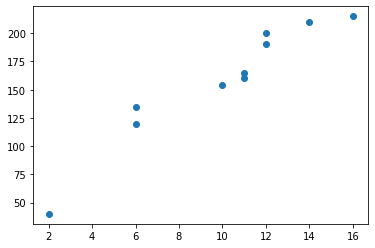

In [112]:
plt.scatter(x,y)

In [113]:
xy = zip(x,y)

In [114]:
df = pd.DataFrame(xy, columns=['x', 'y'])
df

,x,y
0,2,40
1,6,120
2,6,135
3,10,154
4,11,160
5,11,165
6,12,190
7,12,200
8,14,210
9,16,215


In [115]:
x_mean = x.sum()/len(x) # x.mean()
y_mean = y.sum()/len(y) # y.mean()
print(f"Mean of x: {x_mean}\nMean of y: {y_mean}")

Mean of x: 10.0
Mean of y: 158.9


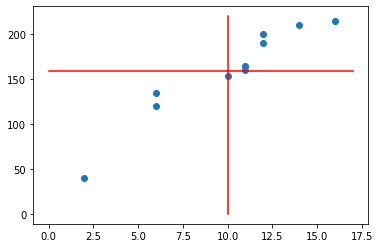

In [116]:
plt.scatter(x,y)
plt.plot([x_mean,x_mean], [0,220], color='red')
plt.plot([0,17], [y_mean,y_mean], color='red')

In [117]:
# x-x' = x-mean(x)
# y-y' = y-mean(y)
df["x-x'"] = df['x'] - x_mean
df["y-y'"] = df['y'] - y_mean 
df

,x,y,x-x',y-y'
0,2,40,-8.0,-118.9
1,6,120,-4.0,-38.9
2,6,135,-4.0,-23.9
3,10,154,0.0,-4.9
4,11,160,1.0,1.1
5,11,165,1.0,6.1
6,12,190,2.0,31.1
7,12,200,2.0,41.1
8,14,210,4.0,51.1
9,16,215,6.0,56.1


In [118]:
# (x-x')^2 = square(x-x')
df["(x-x')^2"] = df["x-x'"]**2
df

,x,y,x-x',y-y',(x-x')^2
0,2,40,-8.0,-118.9,64.0
1,6,120,-4.0,-38.9,16.0
2,6,135,-4.0,-23.9,16.0
3,10,154,0.0,-4.9,0.0
4,11,160,1.0,1.1,1.0
5,11,165,1.0,6.1,1.0
6,12,190,2.0,31.1,4.0
7,12,200,2.0,41.1,4.0
8,14,210,4.0,51.1,16.0
9,16,215,6.0,56.1,36.0


In [119]:
# (x-x')(y-y') = (x-x')*(y-y')
df["(x-x')(y-y')"] = df["x-x'"]*df["y-y'"]
df

,x,y,x-x',y-y',(x-x')^2,(x-x')(y-y')
0,2,40,-8.0,-118.9,64.0,951.2
1,6,120,-4.0,-38.9,16.0,155.6
2,6,135,-4.0,-23.9,16.0,95.6
3,10,154,0.0,-4.9,0.0,-0.0
4,11,160,1.0,1.1,1.0,1.1
5,11,165,1.0,6.1,1.0,6.1
6,12,190,2.0,31.1,4.0,62.2
7,12,200,2.0,41.1,4.0,82.2
8,14,210,4.0,51.1,16.0,204.4
9,16,215,6.0,56.1,36.0,336.6


In [120]:
# s1 = sum of (x-x')^2
# s2 = sum of (x-x')(y-y')
s1 = df["(x-x')^2"].sum()
s2 = df["(x-x')(y-y')"].sum()

In [121]:
# b1 = Σ(x-x')(y-y')/ Σ(x-x')^2 
b1 = s2/s1
b1

11.99367088607595

In [122]:
# mean(y) = b1*mean(x) + b0
# b0 = mean(y) - b1*mean(x)
b0 = y_mean - b1*x_mean
b0

38.96329113924051

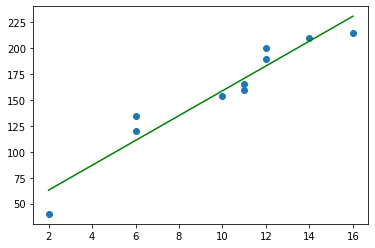

In [123]:
plt.scatter(x,y)
plt.plot(x, b1*x+b0, color='green')

In [124]:
# predicted = (m*x + b)
df['predicted'] = b1*df['x'] + b0
df

,x,y,x-x',y-y',(x-x')^2,(x-x')(y-y'),predicted
0,2,40,-8.0,-118.9,64.0,951.2,62.950633
1,6,120,-4.0,-38.9,16.0,155.6,110.925316
2,6,135,-4.0,-23.9,16.0,95.6,110.925316
3,10,154,0.0,-4.9,0.0,-0.0,158.900000
4,11,160,1.0,1.1,1.0,1.1,170.893671
5,11,165,1.0,6.1,1.0,6.1,170.893671
6,12,190,2.0,31.1,4.0,62.2,182.887342
7,12,200,2.0,41.1,4.0,82.2,182.887342
8,14,210,4.0,51.1,16.0,204.4,206.874684
9,16,215,6.0,56.1,36.0,336.6,230.862025


In [127]:
# error = (y - predicted)
df['error'] = df['y'] - df['predicted']
df

,x,y,x-x',y-y',(x-x')^2,(x-x')(y-y'),predicted,error
0,2,40,-8.0,-118.9,64.0,951.2,62.950633,-22.950633
1,6,120,-4.0,-38.9,16.0,155.6,110.925316,9.074684
2,6,135,-4.0,-23.9,16.0,95.6,110.925316,24.074684
3,10,154,0.0,-4.9,0.0,-0.0,158.900000,-4.900000
4,11,160,1.0,1.1,1.0,1.1,170.893671,-10.893671
5,11,165,1.0,6.1,1.0,6.1,170.893671,-5.893671
6,12,190,2.0,31.1,4.0,62.2,182.887342,7.112658
7,12,200,2.0,41.1,4.0,82.2,182.887342,17.112658
8,14,210,4.0,51.1,16.0,204.4,206.874684,3.125316
9,16,215,6.0,56.1,36.0,336.6,230.862025,-15.862025


In [128]:
predicted_sum = df['predicted'].sum()
error_sum = df['error'].sum()
print(f"Sum of predicted = {predicted_sum}\nSum of error = {error_sum}")

Sum of predicted = 1589.0000000000002
Sum of error = -1.7763568394002505e-13


In [129]:
# SSE = square(error)
df['SSE'] = df['error']**2
df

,x,y,x-x',y-y',(x-x')^2,(x-x')(y-y'),predicted,error,SSE
0,2,40,-8.0,-118.9,64.0,951.2,62.950633,-22.950633,526.731551
1,6,120,-4.0,-38.9,16.0,155.6,110.925316,9.074684,82.349881
2,6,135,-4.0,-23.9,16.0,95.6,110.925316,24.074684,579.590388
3,10,154,0.0,-4.9,0.0,-0.0,158.900000,-4.900000,24.010000
4,11,160,1.0,1.1,1.0,1.1,170.893671,-10.893671,118.672065
5,11,165,1.0,6.1,1.0,6.1,170.893671,-5.893671,34.735357
6,12,190,2.0,31.1,4.0,62.2,182.887342,7.112658,50.589907
7,12,200,2.0,41.1,4.0,82.2,182.887342,17.112658,292.843072
8,14,210,4.0,51.1,16.0,204.4,206.874684,3.125316,9.767603
9,16,215,6.0,56.1,36.0,336.6,230.862025,-15.862025,251.603847


In [131]:
# SST = square((y - mean(y))
df['SST'] = (df['y'] - y_mean)**2
df

,x,y,x-x',y-y',(x-x')^2,(x-x')(y-y'),predicted,error,SSE,SST
0,2,40,-8.0,-118.9,64.0,951.2,62.950633,-22.950633,526.731551,14137.21
1,6,120,-4.0,-38.9,16.0,155.6,110.925316,9.074684,82.349881,1513.21
2,6,135,-4.0,-23.9,16.0,95.6,110.925316,24.074684,579.590388,571.21
3,10,154,0.0,-4.9,0.0,-0.0,158.900000,-4.900000,24.010000,24.01
4,11,160,1.0,1.1,1.0,1.1,170.893671,-10.893671,118.672065,1.21
5,11,165,1.0,6.1,1.0,6.1,170.893671,-5.893671,34.735357,37.21
6,12,190,2.0,31.1,4.0,62.2,182.887342,7.112658,50.589907,967.21
7,12,200,2.0,41.1,4.0,82.2,182.887342,17.112658,292.843072,1689.21
8,14,210,4.0,51.1,16.0,204.4,206.874684,3.125316,9.767603,2611.21
9,16,215,6.0,56.1,36.0,336.6,230.862025,-15.862025,251.603847,3147.21


In [132]:
# SSR = square(predicted - mean(y))
df['SSR'] = (df['predicted'] - y_mean)**2
df

,x,y,x-x',y-y',(x-x')^2,(x-x')(y-y'),predicted,error,SSE,SST,SSR
0,2,40,-8.0,-118.9,64.0,951.2,62.950633,-22.950633,526.731551,14137.21,9206.281045
1,6,120,-4.0,-38.9,16.0,155.6,110.925316,9.074684,82.349881,1513.21,2301.570261
2,6,135,-4.0,-23.9,16.0,95.6,110.925316,24.074684,579.590388,571.21,2301.570261
3,10,154,0.0,-4.9,0.0,-0.0,158.900000,-4.900000,24.010000,24.01,0.000000
4,11,160,1.0,1.1,1.0,1.1,170.893671,-10.893671,118.672065,1.21,143.848141
5,11,165,1.0,6.1,1.0,6.1,170.893671,-5.893671,34.735357,37.21,143.848141
6,12,190,2.0,31.1,4.0,62.2,182.887342,7.112658,50.589907,967.21,575.392565
7,12,200,2.0,41.1,4.0,82.2,182.887342,17.112658,292.843072,1689.21,575.392565
8,14,210,4.0,51.1,16.0,204.4,206.874684,3.125316,9.767603,2611.21,2301.570261
9,16,215,6.0,56.1,36.0,336.6,230.862025,-15.862025,251.603847,3147.21,5178.533088


In [133]:
SSE_sum = df['SSE'].sum()
SST_sum = df['SST'].sum()
SSR_sum = df['SSR'].sum()
print(f"Sum of SSE = {SSE_sum}\nSum of SST = {SST_sum}\nSum of SSR = {SSR_sum}")

Sum of SSE = 1970.8936708860747
Sum of SST = 24698.9
Sum of SSR = 22728.00632911393


###### We can verfiy SST = SSR + SSE

In [141]:
print(f"SST      : {round(SST_sum)}")
print(f"SSR + SSE: {round(SSR_sum + SSE_sum)}")
print("SST = SSR + SSE (VERIFED)")

SST      : 24699
SSR + SSE: 24699
SST = SSR + SSE (VERIFED)


###### Calculate R-squared

R-squared = SSR/SST

In [143]:
r_squared = SSR_sum/SST_sum
r_squared

0.9202031802677013